In [1]:
import numpy as np
import xarray as xr

In [2]:
path = '/nfs/b0122/Users/earlacoa/emissions/EDGAR-HTAP2_MEIC2015/MOZART_adjusted'

In [3]:
emis_pm25 = xr.open_dataset(f'{path}/EDGARHTAP2_MEIC2015_PM2.5_2010.0.1x0.1.nc')
emis_pm10 = xr.open_dataset(f'{path}/EDGARHTAP2_MEIC2015_PM10_2010.0.1x0.1.nc')
emis_bc = xr.open_dataset(f'{path}/EDGARHTAP2_MEIC2015_BC_2010.0.1x0.1.nc')
emis_oc = xr.open_dataset(f'{path}/EDGARHTAP2_MEIC2015_OC_2010.0.1x0.1.nc')

In [4]:
keys = [key for key in emis_pm25.keys() if 'emis' in key]

In [9]:
emis_om = emis_oc.copy()
emis_oin_pm25 = emis_pm25.copy()
emis_pm25_10 = emis_pm10.copy()

In [10]:
for key in keys:
    emis_om[key] = emis_oc[key] * 1.5
    emis_oin_pm25[key] = emis_pm25[key] - emis_bc[key] - emis_oc[key]
    emis_pm25_10[key] = emis_pm10[key] - emis_pm25[key]
    
    # fix any negative values
    emis_oin_pm25[key] = emis_oin_pm25[key].where(emis_oin_pm25[key] > 0.0, 0.0)
    emis_pm25_10[key] = emis_pm25_10[key].where(emis_pm25_10[key] > 0.0, 0.0)

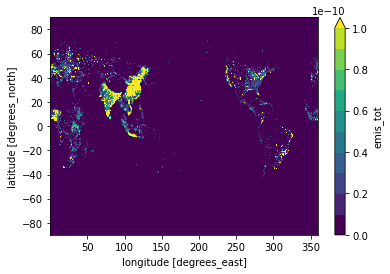

In [11]:
emis_om.emis_tot.isel(time=0).plot.contourf(levels=np.linspace(0, 1e-10, 11), cmap='viridis');

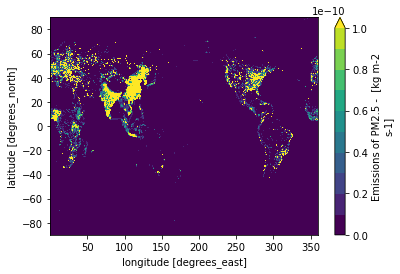

In [12]:
emis_other_pm25.emis_tot.isel(time=0).plot.contourf(levels=np.linspace(0, 1e-10, 11), cmap='viridis');

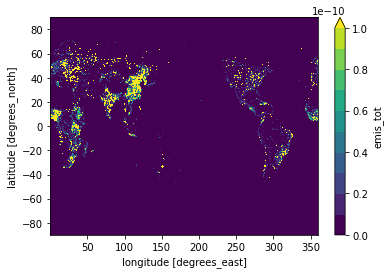

In [13]:
emis_pm25_10.emis_tot.isel(time=0).plot.contourf(levels=np.linspace(0, 1e-10, 11), cmap='viridis');

In [14]:
emis_om.to_netcdf(f'{path}/EDGARHTAP2_MEIC2015_OM_2010.0.1x0.1.nc')
emis_oin_pm25.to_netcdf(f'{path}/EDGARHTAP2_MEIC2015_OIN_PM2.5_2010.0.1x0.1.nc')
emis_pm25_10.to_netcdf(f'{path}/EDGARHTAP2_MEIC2015_PM2.5_10_2010.0.1x0.1.nc')